# Rassemblage données sur les arbres à Paris, Mathis Grillot

In [1]:
import pandas as pd

url = "les-arbres.csv"
df = pd.read_csv(url,sep=';')

#### J'ai enfin réussi à récupérer les données car je n'avais pas mis le fichier csv dans le dossier du jupyter. Je compte faire mon travail sur les arbres à Paris d'après un fichier du gouvernement.

In [2]:
df   

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,131979,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,000520013,Sequoia,Sequoiadendron,giganteum,NaN,229,0,NaN,NON,"48.83092768617471,2.2678132274487957"
1,200510,Arbre,DJS,PARIS 12E ARRDT,NaN,NaN,CENTRE SPORTIF CARNOT / 26 BOULEVARD CARNOT,000103006,Pin,Pinus,nigra,NaN,80,12,Adulte,NON,"48.84265994838907,2.4117052215873245"
2,256872,Arbre,Alignement,PARIS 19E ARRDT,NaN,NaN,PLACE DE LA BATAILLE DE STALINGRAD,000101018,Peuplier,Populus,nigra,''Italica'',35,8,Jeune (arbre),NON,"48.88376222166032,2.369139467977494"
3,275585,Arbre,Alignement,PARIS 7E ARRDT,C2,NaN,ESPLANADE DES INVALIDES,000301019,Tilleul,Tilia,tomentosa,NaN,125,11,Adulte,NON,"48.86020303977866,2.312202725796723"
4,292397,Arbre,Alignement,PARIS 18E ARRDT,2,NaN,RUE JEAN COCTEAU,000202002,Noisetier de Byzance,Corylus,colurna,NaN,50,7,Jeune (arbre)Adulte,NON,"48.89966347627314,2.3520170246569543"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207644,296485,Arbre,Alignement,PARIS 8E ARRDT,11,NaN,RUE TRONCHET,000101011,Platane,Platanus,x hispanica,NaN,66,11,Adulte,NON,"48.871579281361065,2.3254719334691574"
207645,2028059,Arbre,Jardin,PARIS 14E ARRDT,Ravin / Petite ceinture,NaN,PARC MONTSOURIS / 28 BOULEVARD JOURDAN,052804010,Prunus Fleur n. sp.,Prunus,Fleur n. sp.,NaN,0,0,NaN,NON,"48.82173111905671,2.33995186952521"
207646,2030741,Arbre,Jardin,PARIS 15E ARRDT,Cirque BORMANN,NaN,SQUARE CARLO SARRABEZOLLES / 1 RUE RENE RAVAUD,000203004,NaN,Pyrus,n. sp.,NaN,10,3,Jeune (arbre),NON,"48.837729897904175,2.2705410466136247"
207647,240859,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,BOULEVARD JOURDAN,000903006,Platane,Platanus,x hispanica,NaN,115,11,Jeune (arbre)Adulte,NON,"48.82249609005817,2.328181749257706"


#### On peut analyser la structure ici, nous est renseigné les différents arrondissements d'où proviennent les arbres, leur taille et le type d'arbre. On va s'intéresser ici aux localités et à ces tailles, également à l'âge des arbres qui va nous indiquer dans quel quartier assiste-t-on à un renouveau de la végétation.

In [3]:
df.describe()

,idbase,numero,circonferenceencm,hauteurenm
count,2.076490e+05,0.0,207649.000000,207649.000000
mean,4.931537e+05,NaN,81.137265,8.820861
std,6.631098e+05,NaN,63.007294,6.138698
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.606150e+05,NaN,30.000000,5.000000
50%,2.299070e+05,NaN,70.000000,8.000000
75%,2.850980e+05,NaN,115.000000,12.000000
max,2.041581e+06,NaN,1680.000000,710.000000


#### On fait ici une première vision rapide et on remarque particulièrement la moyenne et les max des tailles. On voit un prolbème sur la hauteur max : 710 mètres parait très invraisemblable. On va donc supprimer la ligne.

In [4]:
h=df.groupby(by='hauteurenm')
h.get_group(710)  ##on cherche d'abord la ligne correspondante (on aurait pu directement supprimer mais cela nous donne l'info)

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
65886,221137,Arbre,Alignement,PARIS 15E ARRDT,78,NaN,AVENUE DE BRETEUIL,000504002,Platane,Platanus,x hispanica,NaN,70,710,Jeune (arbre)Adulte,NON,"48.846749081334885,2.3112479619465374"


In [5]:
df.drop(df.loc[df['hauteurenm']==710].index, inplace=True)  ##on utilise un drop pour cela puis on vérifie

In [6]:
df.describe() 

,idbase,numero,circonferenceencm,hauteurenm
count,2.076480e+05,0.0,207648.000000,207648.000000
mean,4.931550e+05,NaN,81.137319,8.817484
std,6.631112e+05,NaN,63.007441,5.942731
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.606148e+05,NaN,30.000000,5.000000
50%,2.299075e+05,NaN,70.000000,8.000000
75%,2.850982e+05,NaN,115.000000,12.000000
max,2.041581e+06,NaN,1680.000000,119.000000


#### Encore une erreur dans la data car 119 mètres...

In [7]:
df.drop(df.loc[df['hauteurenm']==119].index, inplace=True)
df.describe()  ##même problème obtenu... On va refaire l'opération. (il y aurait plus rapide on pourrait regarder combien il y en a)

,idbase,numero,circonferenceencm,hauteurenm
count,2.076470e+05,0.0,207647.000000,207647.000000
mean,4.931566e+05,NaN,81.136501,8.816954
std,6.631123e+05,NaN,63.006490,5.937824
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.606155e+05,NaN,30.000000,5.000000
50%,2.299080e+05,NaN,70.000000,8.000000
75%,2.850985e+05,NaN,115.000000,12.000000
max,2.041581e+06,NaN,1680.000000,116.000000


In [8]:
df.drop(df.loc[df['hauteurenm']==116].index, inplace=True)
df.describe() 

,idbase,numero,circonferenceencm,hauteurenm
count,2.076460e+05,0.0,207646.000000,207646.000000
mean,4.931583e+05,NaN,81.136140,8.816438
std,6.631135e+05,NaN,63.006428,5.933178
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.606162e+05,NaN,30.000000,5.000000
50%,2.299085e+05,NaN,70.000000,8.000000
75%,2.850988e+05,NaN,115.000000,12.000000
max,2.041581e+06,NaN,1680.000000,78.000000


#### C'est déjà mieux même si cela reste aberrant. Cependant on verra plus tard qu'il y a peu de tailles faussées donc cela ne va pas changer grand chose.

In [9]:
df.dtypes  ##nous aide dans la manipulation des objets plus tard

idbase                  int64
typeemplacement        object
domanialite            object
arrondissement         object
complementadresse      object
numero                float64
adresse                object
idemplacement          object
libellefrancais        object
genre                  object
espece                 object
varieteoucultivar      object
circonferenceencm       int64
hauteurenm              int64
stadedeveloppement     object
remarquable            object
geo_point_2d           object
dtype: object

In [10]:
by_arrondissement = df.groupby(by='arrondissement')
by_age = df.groupby(by='stadedeveloppement')  ##on rassemble en groupe selon arrondissement et âge pour visualiser le nombre. On aurait pu raisonner simplement sur les colonnes. 

In [11]:
by_arrondissement.size().sort_values() ##on affiche les données dans l'ordre croissant pour plus de visibilité

arrondissement
PARIS 2E ARRDT         551
PARIS 3E ARRDT        1271
PARIS 9E ARRDT        1375
PARIS 1ER ARRDT       1630
PARIS 6E ARRDT        1787
PARIS 5E ARRDT        2643
PARIS 4E ARRDT        2765
PARIS 10E ARRDT       3609
BOIS DE BOULOGNE      4133
HAUTS-DE-SEINE        5338
PARIS 11E ARRDT       6032
PARIS 8E ARRDT        7476
VAL-DE-MARNE          7579
PARIS 7E ARRDT        8731
PARIS 18E ARRDT      10688
PARIS 14E ARRDT      11593
PARIS 17E ARRDT      11750
BOIS DE VINCENNES    11850
SEINE-SAINT-DENIS    12134
PARIS 12E ARRDT      12840
PARIS 19E ARRDT      14899
PARIS 20E ARRDT      15606
PARIS 13E ARRDT      17018
PARIS 16E ARRDT      17094
PARIS 15E ARRDT      17254
dtype: int64

<Axes: xlabel='arrondissement'>

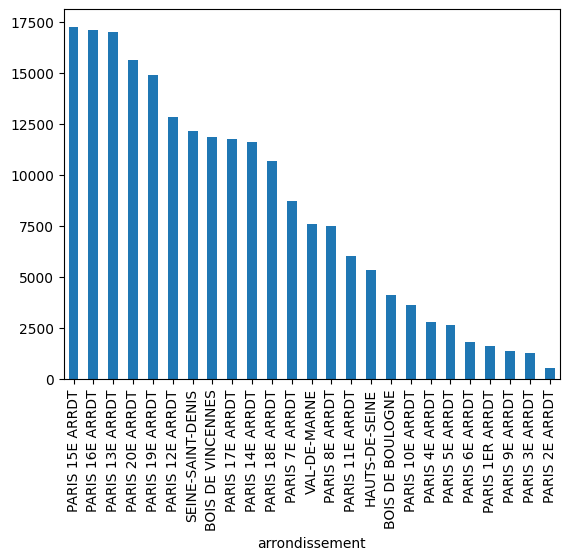

In [12]:
df.arrondissement.value_counts().plot(kind='bar') ##on trace ici les données 

#### On voit que ce sont plutôt les quartiers résidentiels qui abritent le plus grand nombre d'arbres alors que les quartiers plus historiques comme le marais abritent moins d'arbres. Il faut néanmoins prendre en compte la taille des arrondissements. Pour cela on va joindre un autre fichier csv. De plus on aurait pu croire que les bois de Boulogne et de Vincennes abriteraient plus d'arbres.

In [13]:
url2 = "arrondissements-3.csv"
df2 = pd.read_csv(url2, sep=';')  

In [14]:
df2.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,geom_x_y,geom
0,750000003,3.0,75103.0,3√®me Ardt,Temple,750001537.0,1.170883e+06,4519.263648,"48.862872380016924,2.360000985897691","{""coordinates"": [[[2.3638280960629254, 48.8675..."
1,750000009,9.0,75109.0,9√®me Ardt,Op√©ra,750001537.0,2.178303e+06,6471.588290,"48.877163517328796,2.337457543482544","{""coordinates"": [[[2.3397765430833624, 48.8820..."
2,750000005,5.0,75105.0,5√®me Ardt,Panth√©on,750001537.0,2.539375e+06,6239.195396,"48.844443150532726,2.3507146095752596","{""coordinates"": [[[2.364433128355796, 48.84614..."
3,750000019,19.0,75119.0,19√®me Ardt,Buttes-Chaumont,750001537.0,6.792651e+06,11253.182479,"48.8870759965725,2.384820960152513","{""coordinates"": [[[2.3894286961321605, 48.9012..."
4,750000001,1.0,75101.0,1er Ardt,Louvre,750001537.0,1.824613e+06,6054.936862,"48.86256270183607,2.3364433620533878","{""coordinates"": [[[2.328007329038849, 48.86991..."


### On gardera les erreurs d'orthographe car on veut seulement les surfaces.

In [15]:
df2 = df2.set_index("l_ar")
df2.surface.sort_values()

l_ar
2√®me Ardt     9.911537e+05
3√®me Ardt     1.170883e+06
4√®me Ardt     1.600586e+06
1er Ardt       1.824613e+06
6√®me Ardt     2.153096e+06
9√®me Ardt     2.178303e+06
5√®me Ardt     2.539375e+06
10√®me Ardt    2.891739e+06
11√®me Ardt    3.665442e+06
8√®me Ardt     3.880036e+06
7√®me Ardt     4.090057e+06
14√®me Ardt    5.614877e+06
17√®me Ardt    5.668835e+06
20√®me Ardt    5.983446e+06
18√®me Ardt    5.996051e+06
19√®me Ardt    6.792651e+06
13√®me Ardt    7.149311e+06
15√®me Ardt    8.494994e+06
12√®me Ardt    1.631478e+07
16√®me Ardt    1.637254e+07
NaN                     NaN
Name: surface, dtype: float64

#### On voit bien ici qu'il y a un lien direct entre les surfaces les plus grandes et le nombre d'arbres. 

In [16]:
sum(by_arrondissement.size()) ##on cherche ici le nombre total d'arbres à Paris 

207646

In [17]:
by_age.size() 

stadedeveloppement
Adulte                 78516
Jeune (arbre)          36442
Jeune (arbre)Adulte    38515
Mature                  7414
dtype: int64

#### On travaille maintenant sur l'âge des arbres dans sa globalité puis dans chaque quartier. Il y a majoritairement des arbres adultes.

In [18]:
by_genre = df.groupby(by='genre')
by_genre.size().sort_values()   ##permet de trier dans l'ordre croissant les valeurs voulues

genre
Abelia               1
Enkianthus           1
Euscaphis            1
Exochorda            1
Garrya               1
                 ...  
Styphnolobium    11588
Acer             19272
Tilia            22128
Aesculus         24857
Platanus         42621
Length: 182, dtype: int64

In [19]:
df.genre.value_counts() ##même opération que précédemment mais cette fois-ci on travaille directement sur la colonne.

genre
Platanus         42621
Aesculus         24857
Tilia            22128
Acer             19272
Styphnolobium    11588
                 ...  
Genista              1
Acca                 1
Stachyurus           1
Argyrocytisus        1
Idesia               1
Name: count, Length: 182, dtype: int64

#### Je ne sais pas trop quoi tirer des espèces d'arbres...

In [20]:
print(df['circonferenceencm'].max(),df['circonferenceencm'].min())

1680 0


In [21]:
df['circonferenceenm']=df.circonferenceencm/100
print(df['circonferenceenm'].max(),df['circonferenceenm'].min())

16.8 0.0


#### J'ai aussi transformé la circonférence en m pour une meilleure vision. On voit que certains arbres qui viennent d'être plantés ont une taille nulle, ce qui est logique. 


In [22]:
print(df['hauteurenm'].max(),df['hauteurenm'].min())

78 0


<Axes: xlabel='hauteurenm'>

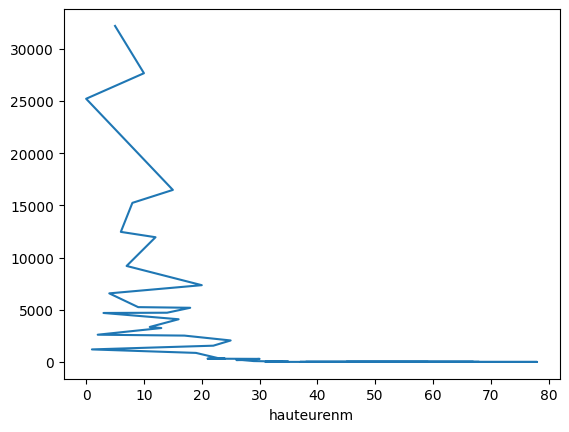

In [23]:
df.hauteurenm.value_counts().plot() 

<Axes: xlabel='hauteurenm'>

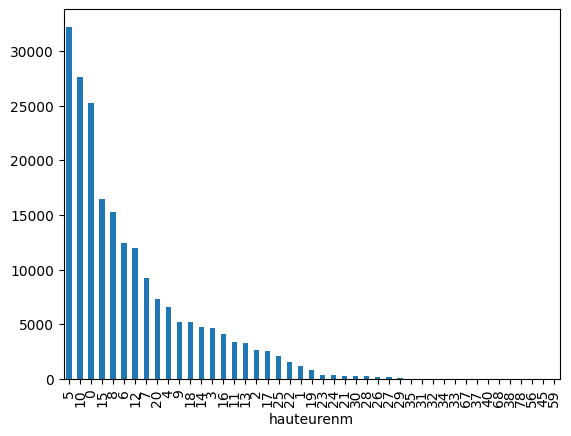

In [24]:
df.hauteurenm.value_counts().plot(kind='bar') 

#### J'ai tracé le graphe en bâtons premièrement mais l'échelle de l'abscisse n'était pas très visible. On se rend mieux compte du phénomène avec le graphe classique : plus la taille est petite plus il y a d'arbres. Idem pour la circonférence ci-dessous.

<Axes: xlabel='circonferenceenm'>

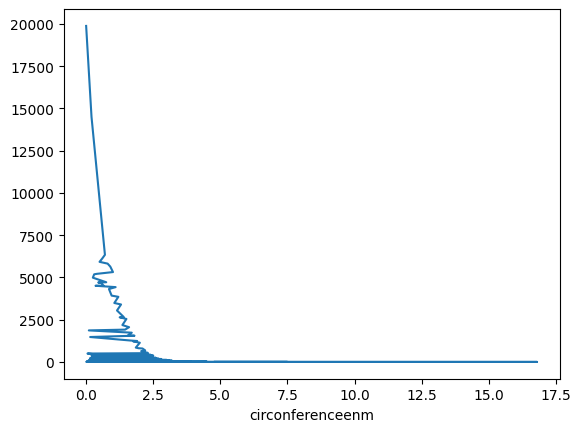

In [25]:
df.circonferenceenm.value_counts().plot() 

<Axes: title={'center': "Circonférence dans l'ordre croissant"}, xlabel='circonferenceencm'>

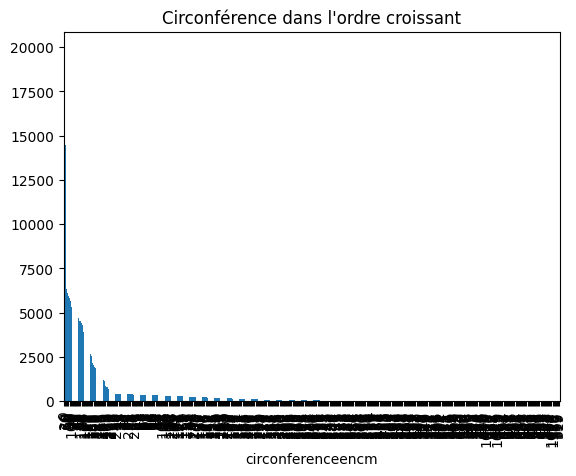

In [26]:
df.circonferenceencm.value_counts().plot(kind='bar',title="Circonférence dans l'ordre croissant")   ##on voit que majorité de petits arbres 

In [27]:
df.hauteurenm==20

0         False
1         False
2         False
3         False
4         False
          ...  
207644    False
207645    False
207646    False
207647    False
207648    False
Name: hauteurenm, Length: 207646, dtype: bool

#### On va maintenant chercher à voir quel quartier possède les arbres les plus grands.

In [28]:
df['taille']=pd.cut(df['hauteurenm'],bins=[ -1,10, 100],labels=['petit', ' grand'])  ##on sépare en 2 nos valeurs, en considérant grand un arbre de plus de 10 mètres

In [29]:
df.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,circonferenceenm,taille
0,131979,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD D...,000520013,Sequoia,Sequoiadendron,giganteum,NaN,229,0,NaN,NON,"48.83092768617471,2.2678132274487957",2.29,petit
1,200510,Arbre,DJS,PARIS 12E ARRDT,NaN,NaN,CENTRE SPORTIF CARNOT / 26 BOULEVARD CARNOT,000103006,Pin,Pinus,nigra,NaN,80,12,Adulte,NON,"48.84265994838907,2.4117052215873245",0.80,grand
2,256872,Arbre,Alignement,PARIS 19E ARRDT,NaN,NaN,PLACE DE LA BATAILLE DE STALINGRAD,000101018,Peuplier,Populus,nigra,''Italica'',35,8,Jeune (arbre),NON,"48.88376222166032,2.369139467977494",0.35,petit
3,275585,Arbre,Alignement,PARIS 7E ARRDT,C2,NaN,ESPLANADE DES INVALIDES,000301019,Tilleul,Tilia,tomentosa,NaN,125,11,Adulte,NON,"48.86020303977866,2.312202725796723",1.25,grand
4,292397,Arbre,Alignement,PARIS 18E ARRDT,2,NaN,RUE JEAN COCTEAU,000202002,Noisetier de Byzance,Corylus,colurna,NaN,50,7,Jeune (arbre)Adulte,NON,"48.89966347627314,2.3520170246569543",0.50,petit


In [30]:
by_taille=df.groupby(by='taille')

In [31]:
by_taille.size()

taille
petit     142274
 grand     65372
dtype: int64

In [32]:
df_grand = df[df.taille=="grand"].copy()
df_grand.head()   ##ça n'a pas marché alors que ça avait marché pour le covid...

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d,circonferenceenm,taille


In [33]:
#df_grand.arrondissement.value_counts().plot(kind='bar')

<Axes: xlabel='typeemplacement'>

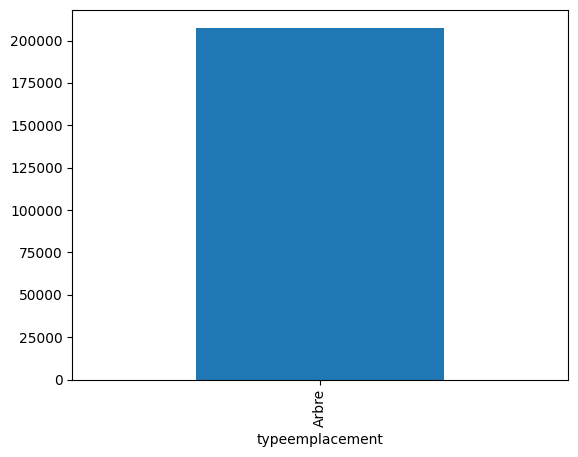

In [34]:
df.typeemplacement.value_counts().plot(kind='bar')  ##que des arbres 

#### On va maintenant regarder la part des arbres jeunes dans chaque quartier.

In [35]:
by_arrondissement_developpement = df.groupby(['arrondissement', 'stadedeveloppement'])  

In [36]:
by_arrondissement_developpement.size()

arrondissement     stadedeveloppement 
BOIS DE BOULOGNE   Adulte                 1916
                   Jeune (arbre)           710
                   Jeune (arbre)Adulte     937
                   Mature                  183
BOIS DE VINCENNES  Adulte                 4440
                                          ... 
SEINE-SAINT-DENIS  Mature                  465
VAL-DE-MARNE       Adulte                 1743
                   Jeune (arbre)           543
                   Jeune (arbre)Adulte     694
                   Mature                  564
Length: 100, dtype: int64

In [37]:
for (arrondissement, developpement), subdf in by_arrondissement_developpement:
    print(f"there were {len(subdf)} {developpement} in class {arrondissement} ")

there were 1916 Adulte in class BOIS DE BOULOGNE 
there were 710 Jeune (arbre) in class BOIS DE BOULOGNE 
there were 937 Jeune (arbre)Adulte in class BOIS DE BOULOGNE 
there were 183 Mature in class BOIS DE BOULOGNE 
there were 4440 Adulte in class BOIS DE VINCENNES 
there were 2822 Jeune (arbre) in class BOIS DE VINCENNES 
there were 1642 Jeune (arbre)Adulte in class BOIS DE VINCENNES 
there were 238 Mature in class BOIS DE VINCENNES 
there were 342 Adulte in class HAUTS-DE-SEINE 
there were 108 Jeune (arbre) in class HAUTS-DE-SEINE 
there were 236 Jeune (arbre)Adulte in class HAUTS-DE-SEINE 
there were 41 Mature in class HAUTS-DE-SEINE 
there were 1822 Adulte in class PARIS 10E ARRDT 
there were 519 Jeune (arbre) in class PARIS 10E ARRDT 
there were 569 Jeune (arbre)Adulte in class PARIS 10E ARRDT 
there were 287 Mature in class PARIS 10E ARRDT 
there were 2246 Adulte in class PARIS 11E ARRDT 
there were 1054 Jeune (arbre) in class PARIS 11E ARRDT 
there were 1584 Jeune (arbre)Adulte

#### Pour conclure, on a pu voir qu'une majorité des arbres présents étaient adultes, que la majorité des arbres se trouvaient dans les quartiers résidentiels. De plus, on a pu explorer la taille de ces arbres.

## FIN